<a href="https://colab.research.google.com/github/SithuniNudara/CNN_Model_to_Classify_Objects/blob/main/CNN_Model_to_Classify_Objects_%5Btable%2C_Chair%2C_and_flower_vas_%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import os
import cv2
import imghdr
from google.colab import files

In [2]:
# Data Preparation: Unzip
zip_ref = zipfile.ZipFile('dataset.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [3]:
# Preprocessing & Loading

# Define parameters
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32


In [4]:
# Load dataset
data_dir = '/content/dataset'

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 180 files belonging to 3 classes.
Using 144 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 180 files belonging to 3 classes.
Using 36 files for validation.


In [7]:
# Get class names
class_names = train_ds.class_names
print(f"Class names: {class_names}")

Class names: ['chair', 'flower_vas', 'table']


In [8]:
# Model Building
model = Sequential([
  # Normalizing pixel values [0,1] as requested [cite: 70]
  Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),

  # Convolutional Layers
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),

  # Dense Layers
  Flatten(),
  Dense(128, activation='relu'),
  Dense(3, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [10]:
data_dir = '/content/dataset'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

print("Checking for bad images...")

for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_path):
        continue

    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        try:

            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f"Removing invalid format: {image_path}")
                os.remove(image_path)
                continue

            img = cv2.imread(image_path)
            if img is None:
                print(f"Removing corrupted image: {image_path}")
                os.remove(image_path)

        except Exception as e:
            print(f"Issue with image {image_path}: {e}")

print("Cleanup complete!")

Checking for bad images...
Cleanup complete!


In [11]:
# Train the Model
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 925ms/step - accuracy: 0.3339 - loss: 1.1133 - val_accuracy: 0.2500 - val_loss: 1.0904
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 832ms/step - accuracy: 0.5951 - loss: 1.0153 - val_accuracy: 0.4444 - val_loss: 1.1036
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7075 - loss: 0.9162 - val_accuracy: 0.4167 - val_loss: 1.0421
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 880ms/step - accuracy: 0.6888 - loss: 0.7718 - val_accuracy: 0.4167 - val_loss: 1.0322
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 706ms/step - accuracy: 0.7202 - loss: 0.6633 - val_accuracy: 0.5278 - val_loss: 1.4584
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 963ms/step - accuracy: 0.7234 - loss: 0.6087 - val_accuracy: 0.6389 - val_loss: 0.8174
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 698ms/step - accuracy: 0.7668 - loss: 0.6041 - val_accuracy: 0.5000 - val_loss: 1.1322
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8260 - loss: 0.4764 - val_accuracy: 0.6389 - val_loss: 0.827

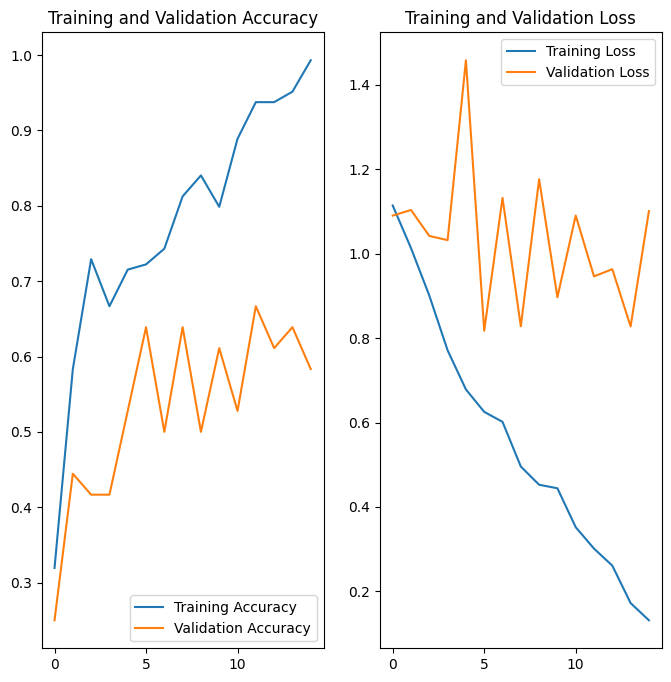

In [12]:
# Plot Accuracy and Loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Please upload an image file (JPG or PNG) to test:


Saving Chair_Test_Image.jpg to Chair_Test_Image.jpg


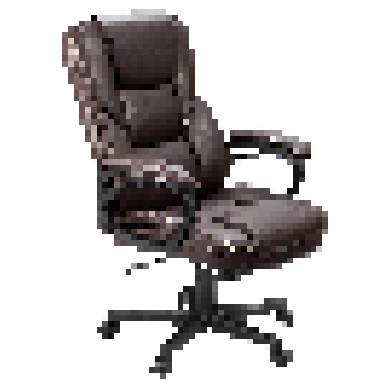

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Result: This image is a chair (57.59% confidence)


In [20]:
#Testings
print("Please upload an image file (JPG or PNG) to test:")
uploaded = files.upload()

# Process uploaded image
for fn in uploaded.keys():

    # Show the image
    path = fn
    img = image.load_img(path, target_size=(64, 64))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Prepare image for the model
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Predict
    classes = model.predict(x)

    # Get the class names from training data
    class_names = train_ds.class_names

    # Find the highest score
    score = tf.nn.softmax(classes[0])
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    print(f"Result: This image is a {predicted_class} ({confidence:.2f}% confidence)")